<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/PyTorch/2_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch as pt
from torch import nn

import matplotlib.pyplot as plt

In [2]:
w = 0.7
b = 0.3

st = 0
end = 2
step = 0.04

x = pt.arange(st, end, step).unsqueeze(dim = 1)
y = b + x*w

x[:10], y[:10], x.shape, y.shape

(tensor([[0.0000],
         [0.0400],
         [0.0800],
         [0.1200],
         [0.1600],
         [0.2000],
         [0.2400],
         [0.2800],
         [0.3200],
         [0.3600]]),
 tensor([[0.3000],
         [0.3280],
         [0.3560],
         [0.3840],
         [0.4120],
         [0.4400],
         [0.4680],
         [0.4960],
         [0.5240],
         [0.5520]]),
 torch.Size([50, 1]),
 torch.Size([50, 1]))

In [3]:
train_split = int(0.8*len(x))

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

x_train.shape, y_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

In [4]:
def plot_pred(train_data = x_train,
              train_lab = y_train,
              test_data = x_test,
              test_lab = y_test,
              pred = None):
    plt.figure(figsize=(8, 5))
    plt.scatter(train_data, train_lab, label = 'Train', c= 'b')
    plt.scatter(test_data, test_lab, label = 'Test', c= 'g')

    if pred is not None:
        plt.scatter(test_data, pred, c= 'red', label = 'Predection')

    plt.legend(prop={'size': 12, })

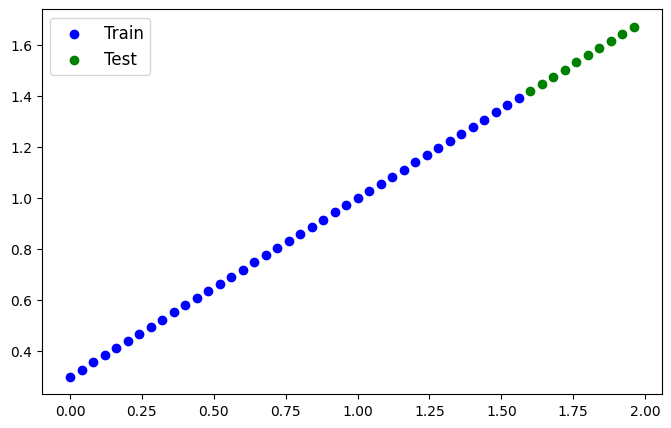

In [5]:
plot_pred()

## Base Model

In [6]:
from torch import nn
import torch as pt

In [7]:
class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(pt.randn(1, requires_grad = True, dtype = pt.float))
        self.bias = nn.Parameter(pt.randn(1, requires_grad= True, dtype = pt.float))

        # Forward method to define computation in model
    def forward(self, x: pt.Tensor) -> pt.Tensor:
        return x*self.weights + self.bias

making the model to check what there in that

In [8]:
pt.manual_seed(42)

model0 = LinReg()

In [9]:
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
with pt.inference_mode():
    y_pred = model0(x_test)
y_pred

tensor([[0.6675],
        [0.6810],
        [0.6944],
        [0.7079],
        [0.7214],
        [0.7349],
        [0.7483],
        [0.7618],
        [0.7753],
        [0.7887]])

In [12]:
# plot_pred(pred = y_pred)

In [13]:
# Setting up a loss function
loss_fn = nn.L1Loss()

# Setting up an optimizer
optimizer = pt.optim.SGD(
    params=model0.parameters(),
    lr=0.02
)

In [14]:
loss_fn

L1Loss()

In [15]:
x_train.shape, y_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

In [18]:
epochs = 100

for epoch in range(epochs):
    # set the model to training mode
    model0.train()

    pred = model0(x_train)

    loss = loss_fn(pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model0.eval()
    with pt.inference_mode():
        test_pred = model0(x_test)
        test_loss = loss_fn(y_test, test_pred)
    print(f"epoch : {epoch} | Loss : {loss} | Test : {test_loss}")

    # print(list(model0.parameters()))

epoch : 0 | Loss : 0.13696631789207458 | Test : 0.2978610396385193
epoch : 1 | Loss : 0.11329568922519684 | Test : 0.25716105103492737
epoch : 2 | Loss : 0.09348521381616592 | Test : 0.22095628082752228
epoch : 3 | Loss : 0.0781048834323883 | Test : 0.18810424208641052
epoch : 4 | Loss : 0.06599222123622894 | Test : 0.16081537306308746
epoch : 5 | Loss : 0.05745013430714607 | Test : 0.1375913918018341
epoch : 6 | Loss : 0.05124150961637497 | Test : 0.11871695518493652
epoch : 7 | Loss : 0.04685986042022705 | Test : 0.1044769138097763
epoch : 8 | Loss : 0.04378433898091316 | Test : 0.09266091883182526
epoch : 9 | Loss : 0.04130092263221741 | Test : 0.08334009349346161
epoch : 10 | Loss : 0.039212968200445175 | Test : 0.07658575475215912
epoch : 11 | Loss : 0.037306882441043854 | Test : 0.07246895134449005
epoch : 12 | Loss : 0.035467199981212616 | Test : 0.06835217773914337
epoch : 13 | Loss : 0.03362752124667168 | Test : 0.0642353892326355
epoch : 14 | Loss : 0.031787849962711334 | Tes

In [19]:
list(model0.parameters())

[Parameter containing:
 tensor([0.6986], requires_grad=True),
 Parameter containing:
 tensor([0.3168], requires_grad=True)]

## Saving the Model


Creating the path to save the model

In [21]:
from pathlib import Path

model_path = Path('models')

model_path.mkdir(parents = True, exist_ok = True)

model_name = "L2_workflow_practice_model.pth"

model_save_path = model_path / model_name

model_save_path

PosixPath('models/L2_workflow_practice_model.pth')

Saving the model

In [22]:
pt.save(obj = model0.state_dict(),
        f = model_save_path)

### Loading the Model

In [23]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3168]))])

In [24]:
model1 = LinReg()
model1.load_state_dict(pt.load(f=model_save_path))

<ipython-input-24-aa970e762a6a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(pt.load(f=model_save_path))


<All keys matched successfully>

In [25]:
model1.state_dict()

OrderedDict([('weights', tensor([0.6986])), ('bias', tensor([0.3168]))])